# Parker Christenson Assignment 3
## 05-25-2024

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\tehwh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data.csv')
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
# getting the unqique values of all of the columns using a for loop
for col in df.columns:
    print(col)
    print(df[col].unique())

satisfaction
['satisfied' 'dissatisfied']
Customer Type
['Loyal Customer' 'disloyal Customer']
Age
[65 47 15 60 70 30 66 10 56 22 58 34 62 35 13 52 55 28  9 25 53 16 64 42
 21 20 26 48 57 31 17 33 32 38 29 24 37  7 39 11 49  8 40 45 67 59 44 69
 51 18 23 12 46 41 54 27 63 61 36 50 68 19 14 43 72 71 80 77 85 78 75 79
 74 73 76]
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco' 'Business' 'Eco Plus']
Flight Distance
[ 265 2464 2138 ... 5832 5120 4260]
Seat comfort
[0 1 4 5 2 3]
Departure/Arrival time convenient
[0 1 2 3 4 5]
Food and drink
[0 1 2 3 4 5]
Gate location
[2 3 4 1 5 0]
Inflight wifi service
[2 0 3 4 5 1]
Inflight entertainment
[4 2 0 3 5 1]
Online support
[2 3 4 5 1 0]
Ease of Online booking
[3 2 1 5 4 0]
On-board service
[3 4 1 2 5 0]
Leg room service
[0 4 3 2 5 1]
Baggage handling
[3 4 1 2 5]
Checkin service
[5 2 4 3 1 0]
Cleanliness
[3 4 1 2 5 0]
Online boarding
[2 3 5 4 1 0]
Departure Delay in Minutes
[   0  310   17   30   47   40    5    2   34    4   13

In [4]:
# column data types
print(df.dtypes)

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
df.columns

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
# changing some categorical columns to numerical/Binary
df['satisfaction'] = df['satisfaction'].map({'dissatisfied': 0, 'satisfied': 1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

# changing the class to 1-3
df['Class'] = df['Class'].map({'Eco' : 1, 'Eco Plus' : 2, 'Business' : 3})

In [7]:
# getting the null values of the columns
#df.isnull().sum()

# printing the unique values of the Arrival Delay in Minutes
print(df['Arrival Delay in Minutes'].unique())

# for the null values in the Arrival Delay in Minutes, we will make them the mean of the column
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

# checking the null values again
df.isnull().sum()

[0.000e+00 3.050e+02 1.500e+01 2.600e+01 4.800e+01 2.300e+01 1.900e+01
 2.000e+00 4.400e+02 5.000e+00 1.000e+00 7.000e+00 8.000e+00 4.500e+01
 6.900e+01 1.300e+01 3.000e+00 1.200e+01 1.000e+01 6.000e+00 8.000e+01
       nan 4.000e+00 8.600e+01 5.700e+01 1.400e+01 9.000e+00 9.600e+01
 2.140e+02 5.000e+01 2.400e+01 1.370e+02 1.800e+01 2.700e+01 1.600e+01
 1.210e+02 7.500e+01 1.700e+01 3.700e+01 5.300e+01 5.900e+01 7.600e+01
 4.400e+01 1.310e+02 3.600e+01 3.300e+01 2.220e+02 3.200e+01 2.900e+01
 2.800e+01 6.100e+01 3.500e+01 4.100e+01 6.300e+01 1.750e+02 3.800e+01
 1.420e+02 9.000e+01 1.630e+02 8.400e+01 7.200e+01 7.400e+01 1.100e+01
 1.180e+02 5.600e+01 1.190e+02 5.200e+01 2.500e+01 2.360e+02 1.120e+02
 6.500e+01 9.300e+01 3.020e+02 3.400e+01 2.000e+01 1.240e+02 1.950e+02
 1.360e+02 9.700e+01 1.790e+02 1.060e+02 7.800e+01 1.040e+02 2.100e+01
 2.100e+02 2.200e+01 1.270e+02 8.700e+01 5.400e+01 2.450e+02 4.200e+01
 4.900e+01 2.080e+02 6.000e+01 4.000e+01 6.600e+01 4.700e+01 2.970e+02
 5.500

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### So we are going to have to figure out what all of the columns mean from the dataset

`Column name`	                                Description
- `Satisfaction`	                            Indicates the satisfaction level of the customer.
- `Customer Type`	                            Type of customer: 'Loyal Customer' or 'Disloyal Customer’.
- `Age`	                                    Age of the customer
- `Type of Travel	Purpose of the travel`:  '  Business travel' or 'Personal Travel’.
- `Class`	                                    Class of travel:'Business', 'Eco', or 'Eco Plus’.
- `Flight Distance	The distance of the flight in kilometres`
- `Seat comfort`	                            Rating of seat comfort provided during the flight (1 to 5).
- `Departure/Arrival time convenient`	        Rating of the convenience of departure/arrival time (1 to 5).
- `Food and drink`	                        Rating of food and drink quality provided during the flight (1 to 5).
- `Gate location	`                           Rating of gate location convenience (1 to 5).
- `Inflight wifi service`	                    Rating of inflight wifi service satisfaction (1 to 5).
- `Inflight entertainment`	                Rating of inflight entertainment satisfaction (1 to 5).
- `Online support`	                        Rating of online customer support satisfaction (1 to 5).
- `Ease of Online booking`	                Rating of ease of online booking satisfaction (1 to 5).
- `On-board service`	                        Rating of on-board service satisfaction (1 to 5).
- `Leg room service`	                        Rating of leg room service satisfaction (1 to 5).
- `Baggage handling`	                        Rating of baggage handling satisfaction (1 to 5).
- `Checkin service	Rating of check-in service satisfaction (1 to 5).`
- `Cleanliness	Rating of cleanliness satisfaction (1 to 5).`
- `Online boarding	Rating of online boarding satisfaction (1 to 5).`
- `Departure Delay in Minutes`	            Total departure delay in minutes.
- `Arrival Delay in Minutes`	             Total arrival delay in minutes.

## Building a Single classifiction tree using sk learn 

### Target column is `Satisfaction` and we are going to use all of the other columns to predict the target column

In [8]:
# importing all of the SK learn libraries for the single class classification tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [9]:
# dropping the target column
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# creating the model
model = DecisionTreeClassifier(random_state=42)

# fitting the model
model.fit(X_train, y_train)

# predicting the model
y_pred = model.predict(X_test)

# getting the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# getting the classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.9361718509393286
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11675
           1       0.94      0.94      0.94     14301

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



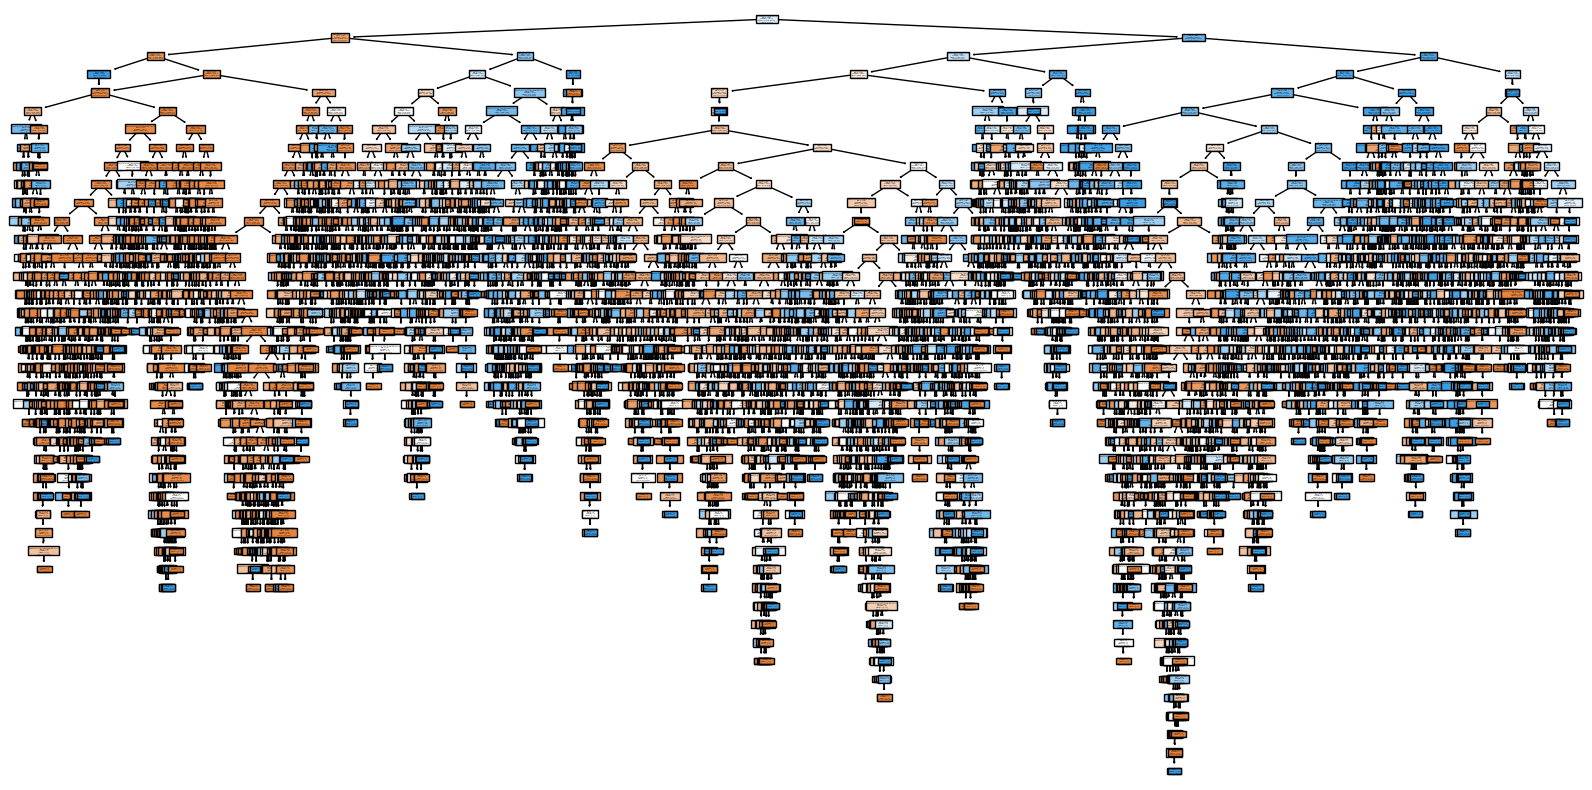

In [10]:
from sklearn.tree import plot_tree

# plotting the tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['dissatisfied', 'satisfied'])
plt.show()

## Now we are going to make a random forest model using the same split of data

In [11]:
# importing the random forest classifier from sk learn 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# fitting the random forest model
rf_model.fit(X_train, y_train)

# predicting the model
y_pred_rf = rf_model.predict(X_test)

# getting the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# getting the classification report
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9570757622420696
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [12]:
# comparing the two models using cross validation
cross_val = cross_val_score(model, X, y, cv=5)
cross_val_rf = cross_val_score(rf_model, X, y, cv=5)


# print statements
print('Decision Tree Cross Validation:', cross_val)
print('Random Forest Cross Validation:', cross_val_rf)

Decision Tree Cross Validation: [0.6566061  0.5315291  0.8131352  0.80778411 0.66257314]
Random Forest Cross Validation: [0.78299199 0.57533877 0.88924392 0.8618725  0.65402679]


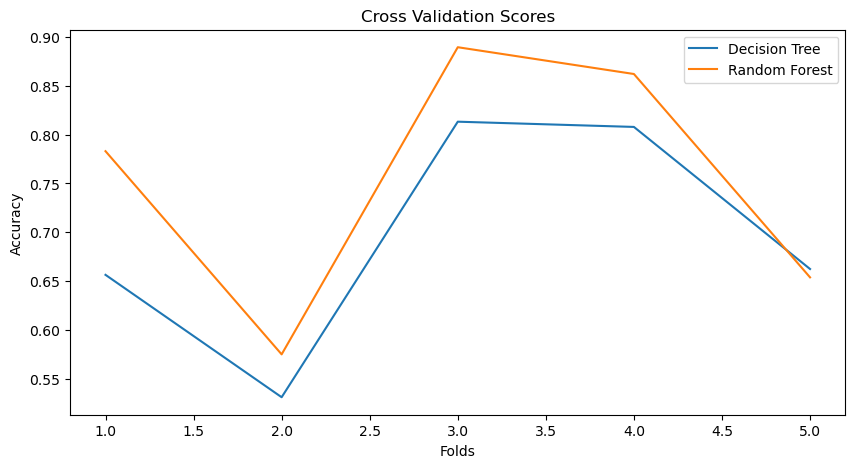

In [13]:
# plotting the cross validation for both models 
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cross_val, label='Decision Tree')
plt.plot(range(1, 6), cross_val_rf, label='Random Forest')
plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.title('Cross Validation Scores')
plt.legend()

### `Breaking Down the two model comparisons`

### `Single classification Decision Tree`

- `Precision unsatisfied`	0.93
- `Recall unsatisfied`	0.93
- `F1 unsatisfied`	0.94
- `Precision satisfied`	0.97
- `Recall satisfied`	0.95
- `F1 satisfied`	0.96


### `Random Forest`

- `Precision unsatisfied`	0.96
- `Recall unsatisfied`	0.95
- `F1 unsatisfied`	0.95

- `Precision satisfied`	0.97
- `Recall satisfied`	0.95
- `F1 satisfied`	0.96

### `Conclusion`

Fo rthe single classification tree we can see that the model performed worse than the random forest model specifically in the unsatisfied category. The random forest model had a higher precision, recall, and F1 score for the unsatisfied category. For the satisfied category both of the models performed generally the same. 

Risks with the single classification tree model is that it is more prone to overfitting and the random forest model is more robust to overfitting. Which does cause some concern when you start to add more data to the model.

A positive for random forests is that they are able to provide a feature importance, which can help us understand what features are most important in predicting the target column.

The Random forest model is not as likely to overfit, but they can make the model more complex by their defining rules. With that being said, for this data set, the model did a really good job of predicting the target column, but how well would that work on real world data, that is something that we would have to figure out by applying the model to real world data.